# 棒球赛数据分析
> 数据来源：http://www.seanlahman.com/baseball-archive/statistics/ (2016 Version)

### 感兴趣问题：
* 与左右手相关的问题
    1. 历年来所有球员中有多少人使用左手？多少人使用右手？这些球员有多少进入全明星赛,左手球员比例大,还是右手球员比例大?


* 获奖球员相关问题
    1. 历年来所有获奖球员的分布情况：年龄，球队等
    
    
* 球员薪酬问题
    1. 历年来球员薪酬变化情况
    2. 历年薪酬最高的球员的情况

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
csv_path = './baseballdatabank-2017.1/core/'

### 探索球员中左右手比例问题

In [2]:
# 用到的表: Master, AllStarFull
master = pd.read_csv(csv_path + 'Master.csv')
allstar = pd.read_csv(csv_path + 'AllstarFull.csv')

In [3]:
allstar_player = allstar.merge(master, on="playerID",how="inner" )

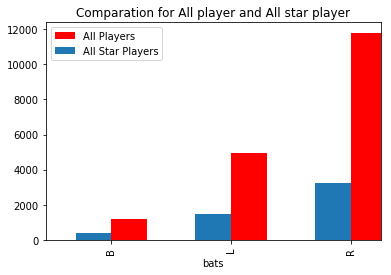

In [4]:
# 绘制所有球员和全明赛球员中左右手球员的柱形图
fix,ax=plt.subplots(1,1)
master.groupby('bats').size().plot(kind='bar',position=0,label='All Players',color='r',width=0.3)
allstar_player.groupby('bats').size().plot(kind='bar',position=1,label='All Star Players',width=0.3)
ax.set_title('Comparation for All player and All star player',fontsize=12,color='black')
plt.legend()

Text(0.5,1,u'Persent(%) for All star player')

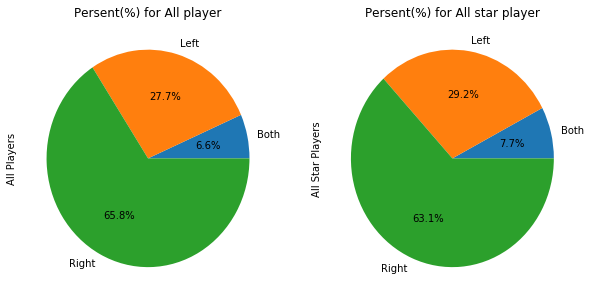

In [5]:
# 绘制所有球员和全明赛球员中左右手球员的比例图
fig,ax=plt.subplots(1,2,figsize=(10,5))
labels='Both','Left','Right'
master.groupby('bats').size().plot(kind='pie',autopct='%.1f%%',labels=labels,ax=ax[0])
ax[0].set_ylabel('All Players')
ax[0].set_title('Persent(%) for All player',fontsize=12,color='black')
allstar_player.groupby('bats').size().plot(kind='pie',autopct='%.1f%%',labels=labels,ax=ax[1])
ax[1].set_ylabel('All Star Players')
ax[1].set_title('Persent(%) for All star player',fontsize=12,color='black')

结论：从现有数据来看，虽然整体上使用右手的球员更多，但是所有球员和进入全明星赛球员张，使用左手和使用右手的球员比例是差不多的。

作图参考：
   * https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py
   * https://matplotlib.org/api/text_api.html
   * https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html?highlight=pie#matplotlib.pyplot.pie
   * https://matplotlib.org/gallery/pie_and_polar_charts/pie_demo2.html#sphx-glr-gallery-pie-and-polar-charts-pie-demo2-py

### 探索获奖球员相关问题

In [6]:
# 用到的表：AwardsPlayers, Master
master = pd.read_csv(csv_path + 'Master.csv')
awards = pd.read_csv(csv_path + 'AwardsPlayers.csv')

#### 1. 分析获奖球员的年龄分布情况

In [7]:
awards_player_full = awards.merge(master,on='playerID',how='left')
awards_player_full['Age'] = awards_player_full['yearID']-awards_player_full['birthYear']
awards_player_full.head()

,playerID,awardID,yearID,lgID,tie,notes,birthYear,birthMonth,birthDay,birthCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,Age
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN,1856.0,4.0,2.0,Ireland,...,Thomas Henry,160.0,67.0,R,R,1874-05-05,1884-08-11,bondt101,bondto01,21.0
1,hinespa01,Triple Crown,1878,NL,NaN,NaN,1855.0,3.0,1.0,USA,...,Paul Aloysius,173.0,69.0,R,R,1872-04-20,1891-07-03,hinep101,hinespa01,23.0
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN,1856.0,4.0,3.0,USA,...,Guy Jackson,190.0,72.0,R,R,1882-05-02,1890-09-30,heckg101,heckegu01,28.0
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN,1854.0,12.0,11.0,USA,...,Charles Gardner,168.0,69.0,R,R,1880-05-05,1891-08-11,radbc101,radboch01,30.0
4,oneilti01,Triple Crown,1887,AA,NaN,NaN,1858.0,5.0,25.0,CAN,...,James Edward,167.0,73.0,R,R,1883-05-05,1892-08-30,oneit101,o'neiti01,29.0


In [8]:
# 分析数据中是否有年龄异常的情况
awards_player_full[(awards_player_full['Age'] < 15.0) | (awards_player_full['Age'] > 50.0)]

,playerID,awardID,yearID,lgID,tie,notes,birthYear,birthMonth,birthDay,birthCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,Age
2053,ayalabo01,TSN Player of the Year,1954,AL,NaN,NaN,1969.0,7.0,8.0,USA,...,Robert Joseph,190.0,74.0,R,R,1992-09-05,1999-10-02,ayalb002,ayalabo01,-15.0
5123,valenbo02,Branch Rickey Award,2002,ML,NaN,NaN,1950.0,5.0,13.0,USA,...,Robert John,189.0,70.0,R,R,1969-09-02,1979-09-30,valeb102,valenbo02,52.0
5205,hemonro99,Branch Rickey Award,2003,ML,NaN,NaN,1929.0,10.0,26.0,USA,...,Roland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hemonro99,74.0
5447,lasorto01,Branch Rickey Award,2006,ML,NaN,NaN,1927.0,9.0,22.0,USA,...,Thomas Charles,175.0,70.0,L,L,1954-08-05,1956-07-08,lasot101,lasorto01,79.0


第1条数据，player获奖年份yearID比出生日期birthYear还早,应该是数据统计有误，在统计时需要删除。
后面3条数据，球员获奖时年龄分别为52，74，79，感觉年龄有点偏大了，不太常见，决定过滤掉他们。

In [9]:
# 查看过滤后数据情况
awards_player_new = awards_player_full[(awards_player_full['Age'] <= 50.0) & (awards_player_full['Age'] >= 15.0)]
awards_player_new['Age'].describe()

count    6154.000000
mean       29.222944
std         4.039785
min        20.000000
25%        26.000000
50%        29.000000
75%        32.000000
max        44.000000
Name: Age, dtype: float64

Text(0.5,1,u'Age distribution of award player')

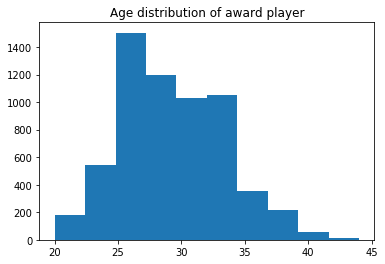

In [10]:
fig,ax=plt.subplots(1,1)
plt.hist(awards_player_new['Age'])
ax.set_title('Age distribution of award player',fontsize=12,color='black')

结论：从现有数据可以看出，获奖的棒球球员年龄主要集中在25-32岁之间，以25-27最多。分析原因可能是因为25岁以前经验不足，32岁以后体力跟不上，所以棒球员的活跃年龄在25-32岁之间。

参考：
   * [pandas进行数据分析需要的一些操作](https://www.cnblogs.com/caicaihong/p/5890239.html)
   * [pandas添加列](https://www.cnblogs.com/rrttp/p/8108188.html)
   * [pandas多条件筛选](https://blog.csdn.net/jt1123/article/details/50086595)

### 2. 分析获奖球员所在球队的情况

In [11]:
# 用到的表Appearances,AwardsPlayers
awards = pd.read_csv(csv_path + 'AwardsPlayers.csv')
appearance = pd.read_csv(csv_path + 'Appearances.csv')

In [12]:
award_player_appear = awards.merge(appearance,on=['playerID','yearID','lgID'],how='inner')

In [13]:
award_player_appear.head()

,playerID,awardID,yearID,lgID,tie,notes,teamID,G_all,GS,G_batting,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN,BSN,61,NaN,61,...,0,0,0,0,0,3,3,NaN,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN,PRO,62,NaN,62,...,0,0,1,0,61,0,61,NaN,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN,LS2,78,NaN,78,...,0,0,0,4,1,0,5,NaN,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN,PRO,87,NaN,87,...,1,0,2,0,1,7,7,NaN,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN,SL4,124,NaN,124,...,0,0,0,124,0,0,124,NaN,NaN,NaN


Text(0.5,1,u'Award player count of all teams')

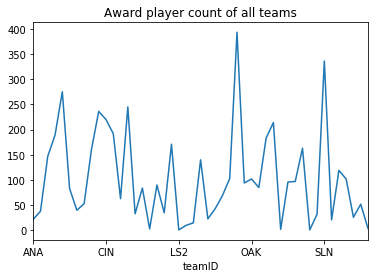

In [14]:
fix,ax=plt.subplots(1,1)
award_player_appear.groupby('teamID').size().plot()
ax.set_title('Award player count of all teams',fontsize=12,color='black')

从上图可知，有部分球队获奖球员在200+以上，重点分析这些球队

Text(0.5,1,u'The team have 200+ award player count')

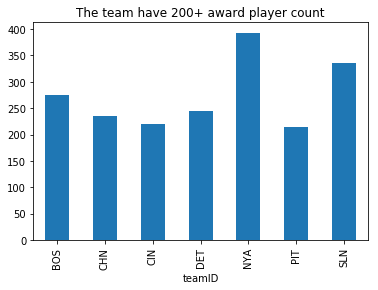

In [15]:
fig,ax=plt.subplots(1,1)
award_team = award_player_appear.groupby('teamID').size()
award_200plus_team = award_team[award_team.values >= 200]
award_200plus_team.plot(kind='bar')
ax.set_title('The team have 200+ award player count',fontsize=12,color='black')

查看这些球队历年来获奖球员的情况

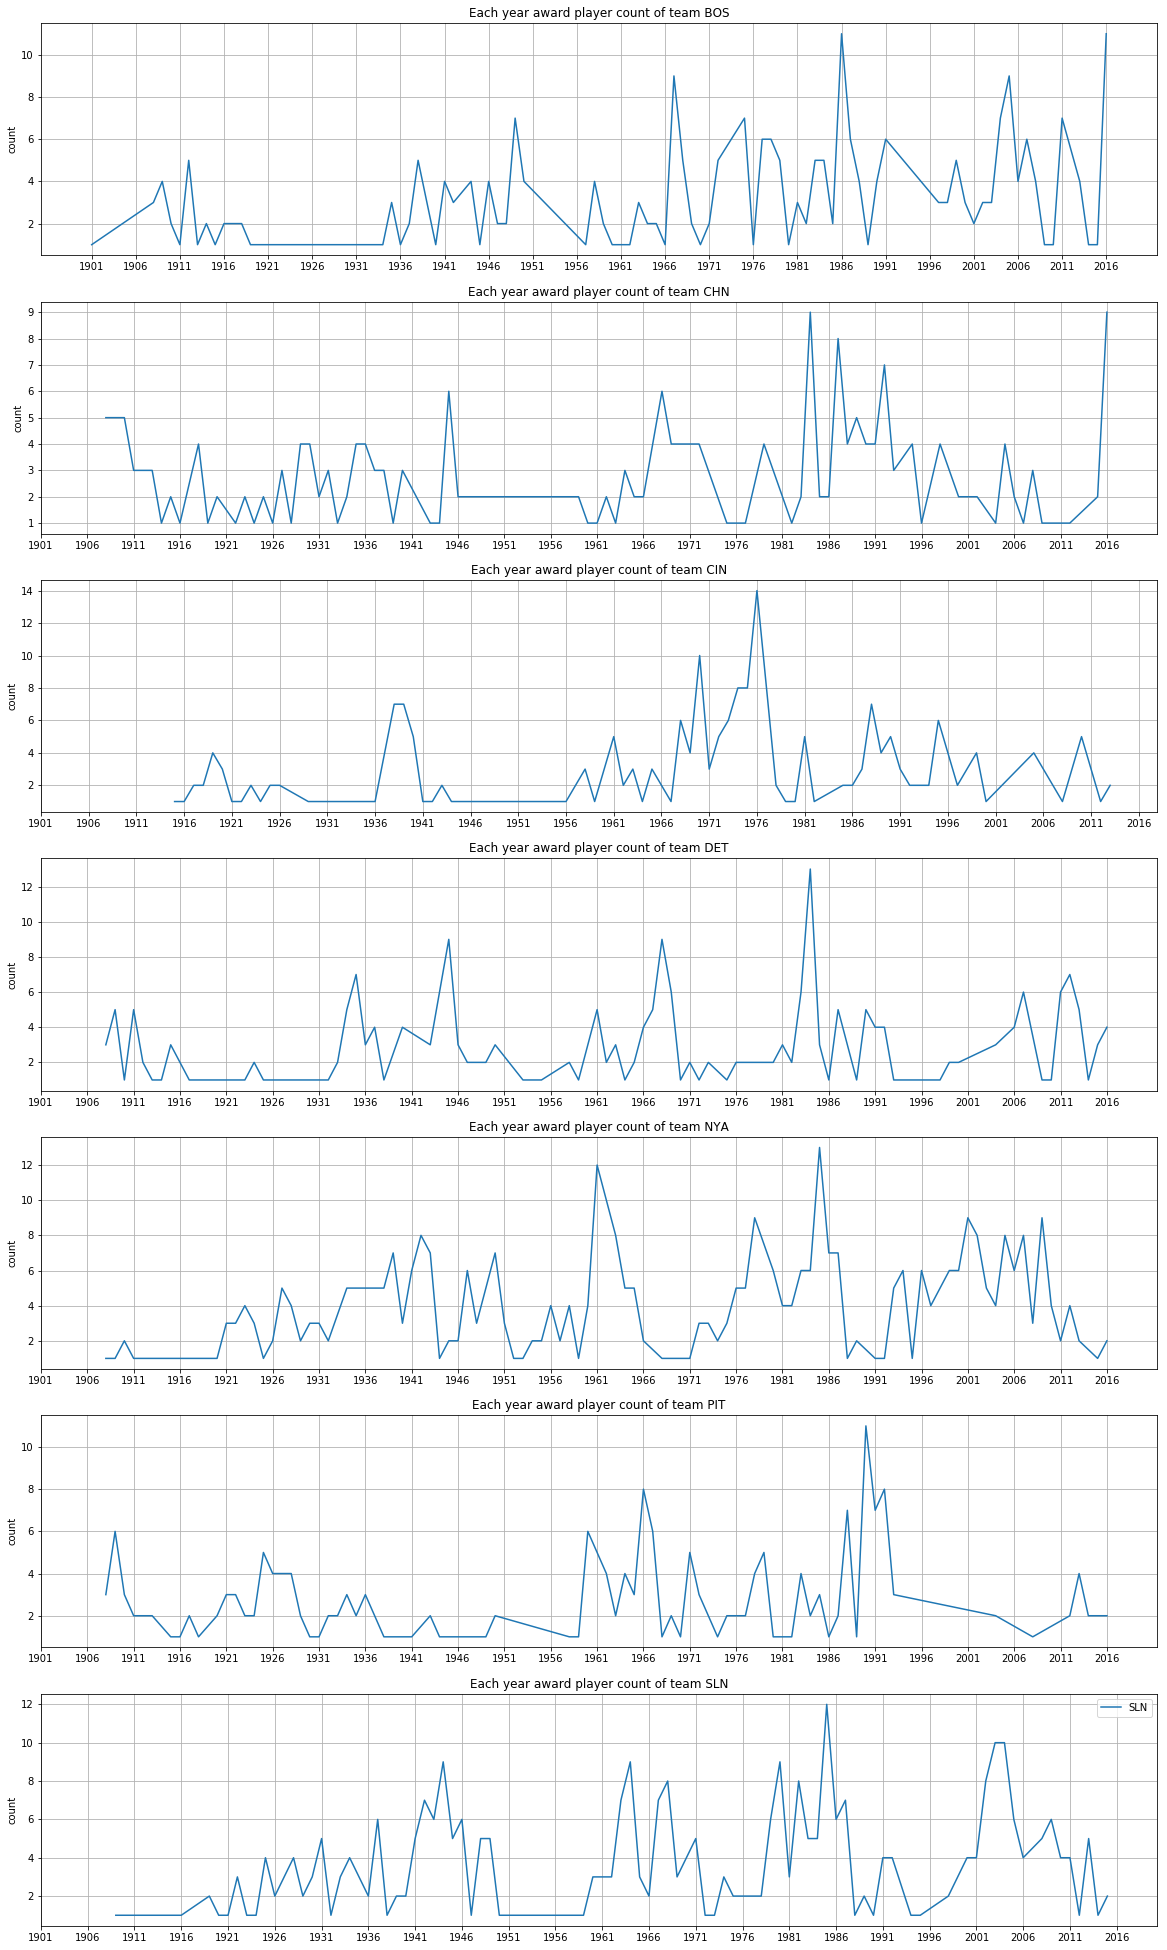

In [16]:
fig,ax=plt.subplots(len(award_200plus_team),1,figsize=(20,len(award_200plus_team)*5))
i=0
for team in award_200plus_team.index:
    ax[i].plot(award_player_appear[award_player_appear['teamID']==team].groupby('yearID').size(),label=team)
    ax[i].set_xticks(np.arange(1901, 2021, 5))
    ax[i].set_ylabel('count')
    # ax[i].set_xlabel(team)
    ax[i].grid(True)
    ax[i].set_title('Each year award player count of team '+team,fontsize=12,color='black')
    i=i+1
plt.legend()

从以上数据可知，这些球队在历史上都多多少少有起起落落的时候，从整体来和近10年（2006-2016）来看，BOS的球员似乎更稳定和出色一些。

参考：
   * https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe
   * https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups
   * https://matplotlib.org/gallery/text_labels_and_annotations/text_rotation.html#sphx-glr-gallery-text-labels-and-annotations-text-rotation-py
   * [pandas.DataFrame.plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)


### 探索球员薪酬问题

In [17]:
# 用到的表: Master, AllStarFull
master = pd.read_csv(csv_path + 'Master.csv')
salary = pd.read_csv(csv_path + 'Salaries.csv')

In [18]:
player_salary = master.merge(salary,on='playerID',how='inner')

Text(0.5,1,u'The mean salary of year')

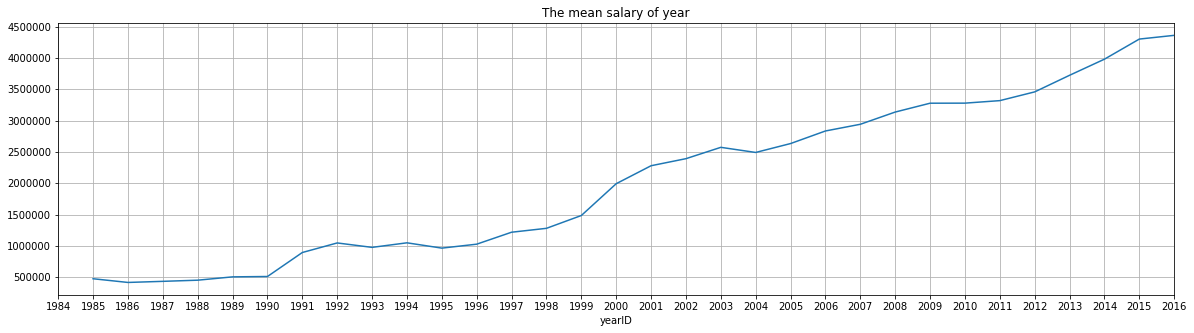

In [19]:
fig,ax=plt.subplots(1,1,figsize=(20,5))
player_salary.groupby('yearID').mean()['salary'].plot()
ax.set_xticks(np.arange(1984, 2017, 1))
ax.grid(True)
ax.set_title('The mean salary of year',fontsize=12,color='black')

结论：从现有数据来看，球员的薪酬水平是逐年呈显著性水平提升的，预计今后的增长幅度也差不多。

In [20]:
# 每年最高薪酬球员
highest_salary_player = player_salary.sort_values(['yearID','salary'],ascending=False).groupby('yearID').head(1)
highest_salary_player.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
12555,kershcl01,1988.0,3.0,19.0,USA,TX,Dallas,NaN,NaN,NaN,...,L,L,2008-05-25,2016-10-01,kersc001,kershcl01,2016,LAD,NL,33000000
12554,kershcl01,1988.0,3.0,19.0,USA,TX,Dallas,NaN,NaN,NaN,...,L,L,2008-05-25,2016-10-01,kersc001,kershcl01,2015,LAN,NL,32571000
8990,greinza01,1983.0,10.0,21.0,USA,FL,Orlando,NaN,NaN,NaN,...,R,R,2004-05-22,2016-09-21,greiz001,greinza01,2014,LAN,NL,26000000
20367,rodrial01,1975.0,7.0,27.0,USA,NY,New York,NaN,NaN,NaN,...,R,R,1994-07-08,2016-08-12,rodra001,rodrial01,2013,NYA,AL,29000000
20366,rodrial01,1975.0,7.0,27.0,USA,NY,New York,NaN,NaN,NaN,...,R,R,1994-07-08,2016-08-12,rodra001,rodrial01,2012,NYA,AL,30000000


In [21]:
highest_salary_player.tail()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
10559,hershor01,1958.0,9.0,16.0,USA,NY,Buffalo,NaN,NaN,NaN,...,R,R,1983-09-01,2000-06-26,herso001,hershor01,1989,LAN,NL,2766667
22210,smithoz01,1954.0,12.0,26.0,USA,AL,Mobile,NaN,NaN,NaN,...,B,R,1978-04-07,1996-09-29,smito001,smithoz01,1988,SLN,NL,2340000
21448,schmimi01,1949.0,9.0,27.0,USA,OH,Dayton,NaN,NaN,NaN,...,R,R,1972-09-12,1989-05-28,schmm001,schmimi01,1987,PHI,NL,2127333
7503,fostege01,1948.0,12.0,1.0,USA,AL,Tuscaloosa,NaN,NaN,NaN,...,R,R,1969-09-10,1986-09-06,fostg001,fostege01,1986,NYN,NL,2800000
21446,schmimi01,1949.0,9.0,27.0,USA,OH,Dayton,NaN,NaN,NaN,...,R,R,1972-09-12,1989-05-28,schmm001,schmimi01,1985,PHI,NL,2130300


Text(0.5,1,u'The birth State of max-salary player')

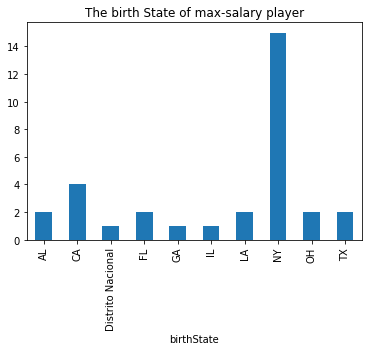

In [22]:
# 分析最高薪水球员一般出生在哪个州
fig,ax=plt.subplots(1,1)
highest_salary_player.groupby('birthState').size().plot(kind='bar')
ax.set_title('The birth State of max-salary player',fontsize=12,color='black')

Text(0.5,1,u'The team of max-salary player')

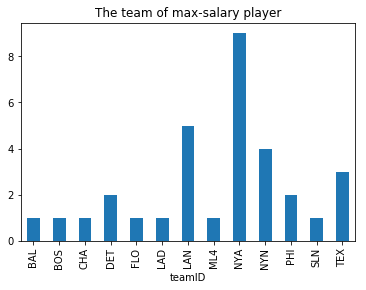

In [23]:
# 分析最高薪水球员隶属于哪只球队
fig,ax=plt.subplots(1,1)
highest_salary_player.groupby('teamID').size().plot(kind='bar')
ax.set_title('The team of max-salary player',fontsize=12,color='black')

结论：从目前数据来看, 历年来最高薪酬的球员基本都是NY州出生的，大部分球员都是属于NYA和LAN球队，以NYA最多。推测可能是纽约的生活成本比其他城市高，所以纽约的球队会花更多的薪酬在球员身上。

参考：
   * https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups
  


### 结论：
从目前的分析来看，1：使用左手和使用右手对于棒球员来说并没有太大区别，拥有差不多的概率成为优秀的棒球员。2：球员在25-27岁之间是黄金年龄，27-32岁次之，球员应该抓紧这个黄金时间多多提升自己。3：棒球的薪资水平历年来节节攀升，而最高薪资水平的棒球员多集中在纽约的球队，棒球员可以到纽约谋求更好的发展。当然，由于时间限制，分析不够深入（比如分析最高薪资水平的球员所在球队的时候并没有这个球队的平均水平在所有球队中的位置），所以这些结论都只是暂时的，基于目前的分析得出的。更严谨的结论可能需要更多的数据或者更深入的分析来支撑。